# Linear Generator and Classifier

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Data Generation


In [2]:
num_samples = 1000
negative_image = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_samples)
positive_image = np.random.multivariate_normal(mean=[3, 0], cov=[[1,0.5],[0.5,1]], size=num_samples)

negative_label = np.zeros((num_samples,1))
positive_label = np.ones((num_samples,1))

# vstack = concatenate two arrays together
train_image = np.vstack((negative_image, positive_image)).astype("float32")
train_label = np.vstack((negative_label, positive_label)).astype("float32")

### Plotting


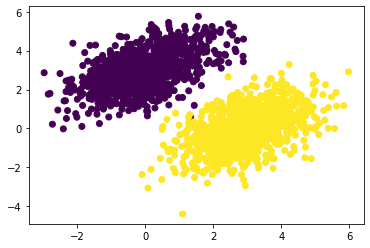

In [3]:
# select x coord, then y coord, then the labels (0 or 1)
plt.scatter(train_image[:, 0], train_image[:, 1], c=train_label[:, 0])
plt.show()

### Generate Model

In [4]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [5]:
# actual model
def model(inputs):
    # inputs (2000, 2) multiplied by W (2, 1)
    # numpy automatically broadcasts, each of the 2000 elements are treated separately
    # for each (2,) x (2, 1), '1' is added to the (2) -> (1, 2) x (2, 1) and the result is stored (1x1 tensor)
    # returns (2000, 1) tensor
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    # square difference (note that this is why we have (2000,1) label tensors)
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [6]:
# learning
learning_rate = 0.1
def training_step(inputs, targets):
    # set up tape, perform the operations with the tape recording
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        s_loss = square_loss(targets, predictions)

    # get tape to calculate the gradient of the losses
    # returns an array, [gradient of W, gradient of b] with how they affect s_loss
    grad_loss_W, grad_loss_b = tape.gradient(s_loss, [W, b])

    # subtract gradient * learning_rate
    W.assign_sub(grad_loss_W * learning_rate)
    b.assign_sub(grad_loss_b * learning_rate)
    return s_loss

### Training Model

In [7]:
for step in range(1, 41):
    loss = training_step(train_image, train_label)
    if step % 10 == 0:
        print(f"Loss at step {step}: {loss:.4f}")

Loss at step 10: 0.0826
Loss at step 20: 0.0485
Loss at step 30: 0.0343
Loss at step 40: 0.0284


### Testing Model


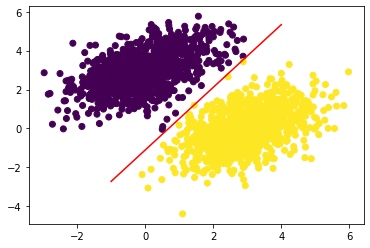

In [8]:
# algebra hell
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(train_image[:,0], train_image[:,1], c=model(train_image[:]) > 0.5)
plt.show()

